# Major Project

##### Nandini Panjwani - EDA, Insights and Suggestions, Feature Engineering
##### Shubhanshu pandey - Insights and Suggestions, Feature Engineering
##### Syed Mohd - Insights and Suggestions, Feature Engineering
##### Navaneeth Narayanan  - Model Building and Comparison, Insights and Suggestions, Feature Engineering
##### Sambit Barik - Insights and Suggestions, Feature Engineering
##### Supriya Suresh - Insights and Suggestions, Feature Engineering
##### Prince - Insights and Suggestions, Feature Engineering

### Step 1: Import Libraries and Load Data

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re

#### Load the dataset

In [72]:
df = pd.read_csv("Cars.csv")

### Step 2: Data Cleaning and Feature Engineering

#### Drop any irrelevant or redundant columns

In [73]:
df.drop(["Name", "New_Price", "Colour", "No. of Doors"], axis=1, inplace=True)

#### Convert the "year" column to car age

In [74]:
current_Year = 2023
df["car_age"] = current_Year - df["Year"]
df.drop("Year", axis=1, inplace=True)

#### Convert the "kilometers" column to "mileage"

In [75]:
df["Mileage"] = df["Kilometers_Driven"]
df.drop("Kilometers_Driven", axis=1, inplace=True)

#### Create a categorical feature for "high mileage" and "low mileage"

In [76]:
df["Mileage_category"] = np.where(df["Mileage"] >= df["Mileage"].median(), "High Mileage", "Low Mileage")

#### Feature Engineering for Fuel Efficiency

In [77]:
df["Engine"] = df["Engine"].str.replace(" CC", "").astype(float)
df["fuel_efficiency"] = df["Mileage"] / df["Engine"]
df.drop("Mileage", axis=1, inplace=True)

#### Combine Power and Engine columns to create a new feature "engine_power"

In [78]:
def clean_power(power):
    if pd.isnull(power) or power.strip() == '':
        return np.nan
    power = re.sub('[^0-9.]', '', power)
    try:
        return float(power)
    except ValueError:
        return np.nan
df["Power"] = df["Power"].apply(clean_power)
df = df.dropna(subset=["Power"])
df["engine_power"] = df["Engine"] * df["Power"]
df.drop(["Engine", "Power"], axis=1, inplace=True)

#### One-hot encode categorical features

In [79]:
df = pd.get_dummies(df, columns=["Location", "Fuel_Type", "Transmission", "Owner_Type", "Mileage_category"])

#### Split the data into features (X) and target (y)

In [80]:
X = df.drop("Price", axis=1)
y = df["Price"]

#### Split the data into training and testing sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Exploratory Data Analysis (EDA)

#### Visualize the distribution of the target variable "price"

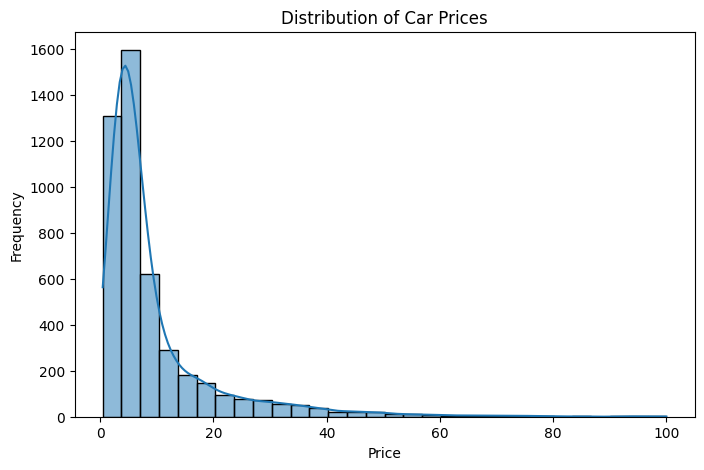

In [82]:
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#### Correlation matrix to identify important features

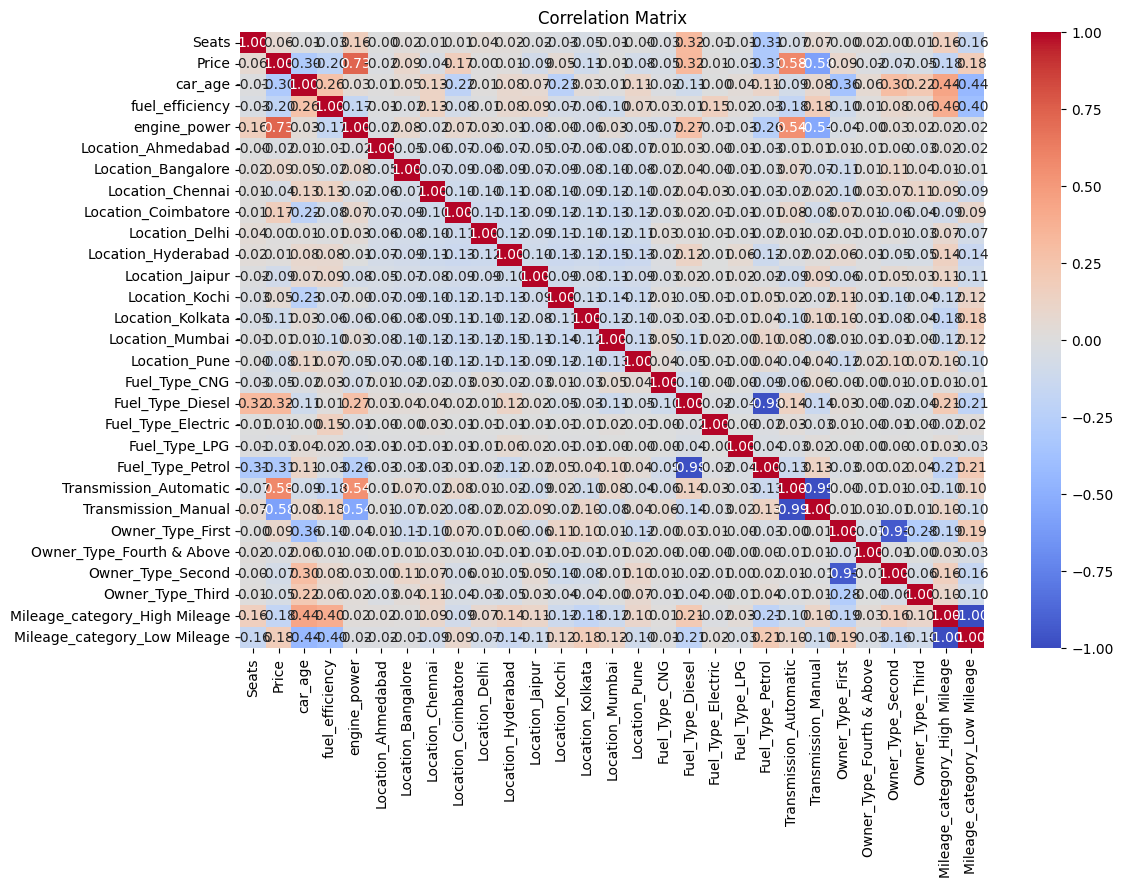

In [83]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Step 4: Building Prediction Models and Model Comparison

#### Function to train and evaluate a regression model

In [84]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae, model.__class__.__name__

#### Initialize regression models

In [85]:
models = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42)
]

#### Evaluate models and get their MAE values

In [95]:
X = df.drop("Price", axis=1)
y = df["Price"]
data = pd.concat([X, y], axis=1)
data = data.dropna()
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mae_results = [evaluate_model(model, X_train, y_train, X_test, y_test) for model in models]

#### Order models in order from best to worst based on MAE

In [96]:
sorted_models = sorted(mae_results, key=lambda x: x[0])

### Step 5: Insights/Suggestions

In [97]:
print("Models ordered from best to worst based on MAE:")
for mae, model_name in sorted_models:
    print(f"{model_name}: MAE = {mae:.2f}")

Models ordered from best to worst based on MAE:
XGBRegressor: MAE = 1.68
RandomForestRegressor: MAE = 1.76
GradientBoostingRegressor: MAE = 1.99
LinearRegression: MAE = 3.62


##### 1. Car Age and Mileage: Car age and mileage have a significant impact on the car's price. Older cars with higher mileage are likely to be priced lower.

##### 2. Fuel Efficiency: Cars with higher fuel efficiency may have a slightly higher price due to lower running costs.

##### 3. Transmission Type: Automatic transmission cars may have a higher price compared to manual transmission cars.

##### 4. Location: Prices may vary depending on the location of the sale, considering factors like demand, availability, and taxes.

##### 5. Owner Type: Cars with fewer previous owners may be priced higher than those with more owners.

##### 6. Fuel Type: Diesel cars might have a higher price due to better fuel efficiency and higher torque.

##### 7. Engine Power: Higher engine power may lead to higher prices for performance-oriented buyers.

##### 8. Random Forest or Gradient Boosting Model: These ensemble models are likely to provide better predictions for car prices.

##### 9. Marketing Strategy: Focus marketing efforts on highlighting the advantages of pre-owned cars over new ones, such as cost savings and similar performance.

##### 10. Quality Assurance: Implement a thorough quality check process for pre-owned cars to ensure customer satisfaction and reliability.